<a href="https://colab.research.google.com/github/Abinand-Shaji/Dog-Breed-CNN/blob/main/Dog_breed_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'dog-breed-identification:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-competitions-data%2Fkaggle-v2%2F7327%2F861871%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240725%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240725T044244Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3Dbf80c27b7ad3625a68974ad9d3f35eb817f20192e1e04677f6a2cc01ba22c9011e2a2f2b9b9d887b917d2a28215bed6a13b1b389ccfd567e918d1b216134d6e04e9d514c9db4c19da73899f5b6ee742defb55588cfd54331d1d504129f3cfc78e0d0bc2d73e83ee87b7c3492be7c2adc4595d43f275065f95db166ae03f7170499a993c8ccd96e815a59430697c4169b10315bab22d50a7244322e671092917884cd6cb537acb811faae7c19ce21f4899920ba7b0d83f2bf3c2bef6124d6fe4c9785d2f509961755915f9094d334e1c8d9649ec8573720ed7d7c1a9294c7b357eef478c865b70a6e17b47fee4216b3a07aecd51a8ae39128c45686acb58e8b65'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 724495926 bytes downloaded
Downloaded and uncompressed: dog-breed-identification
Data source import complete.


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Streaming output truncated to the last 5000 lines.
/kaggle/input/dog-breed-identification/train/69a16ac651167cc990b208b596491a91.jpg
/kaggle/input/dog-breed-identification/train/32a7ae16370c7fe6165a20b007328f6c.jpg
/kaggle/input/dog-breed-identification/train/a42071349ea1285dc2de87a8148a3dac.jpg
/kaggle/input/dog-breed-identification/train/b3f1413df57dc23d8dfaa2a342c6a6ff.jpg
/kaggle/input/dog-breed-identification/train/987de7672a009521f6d8c7cb6f679255.jpg
/kaggle/input/dog-breed-identification/train/d8caec177609c9c618028a270d3fa85c.jpg
/kaggle/input/dog-breed-identification/train/99a553328787ec86117af34870867ca3.jpg
/kaggle/input/dog-breed-identification/train/cc761b9fd55bdd6ab132b44a9b77a7da.jpg
/kaggle/input/dog-breed-identification/train/18b9ef12902b52d6801bbc14c0ebd113.jpg
/kaggle/input/dog-breed-identification/train/b69c61b430c0eb2c2044992afce42556.jpg
/kaggle/input/dog-breed-identification/train/2e5b72a9b07949b8841ea98acab0f459.jpg
/kaggle/input/dog-breed-identification/train/61

In [ ]:
import warnings
warnings.filterwarnings('ignore', category=UserWarning)

import os
import pandas as pd
from shutil import copyfile
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import MobileNetV2
from keras.layers import Dense, GlobalAveragePooling2D, Dropout, BatchNormalization
from keras.models import Model
from keras.regularizers import l2
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from keras.optimizers import Adam


In [ ]:
# Set the path to the dataset
train_dir = '/kaggle/input/dog-breed-identification/train'
labels_file = '/kaggle/input/dog-breed-identification/labels.csv'

# Load the labels
labels_df = pd.read_csv(labels_file)
labels_df

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever
...,...,...
10217,ffd25009d635cfd16e793503ac5edef0,borzoi
10218,ffd3f636f7f379c51ba3648a9ff8254f,dandie_dinmont
10219,ffe2ca6c940cddfee68fa3cc6c63213f,airedale
10220,ffe5f6d8e2bff356e9482a80a6e29aac,miniature_pinscher


In [ ]:
top10=labels_df['breed'].value_counts().head(10)
top10

breed
scottish_deerhound      126
maltese_dog             117
afghan_hound            116
entlebucher             115
bernese_mountain_dog    114
shih-tzu                112
great_pyrenees          111
pomeranian              111
basenji                 110
samoyed                 109
Name: count, dtype: int64

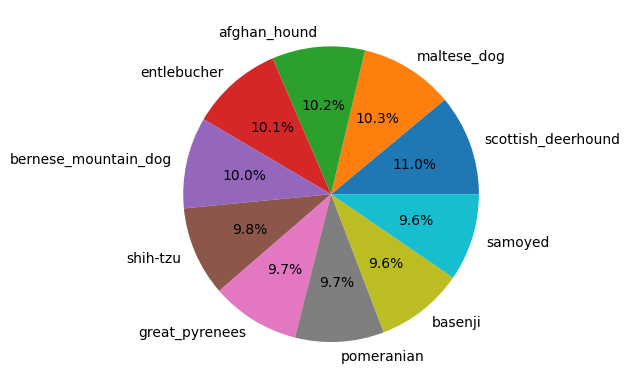

In [ ]:
import matplotlib.pyplot as plt
plt.pie(top10,labels=top10.index,autopct='%1.1f%%')
plt.show()

Filtering top 10 dogs breeds and ensuring image count

In [ ]:

# Filter for 10 breeds with 100 images each
selected_breeds = labels_df['breed'].value_counts().nlargest(10).index

filtered_labels_df = labels_df[labels_df['breed'].isin(selected_breeds)]

# Ensure each breed has exactly 100 images
filtered_labels_df = filtered_labels_df.groupby('breed').head(100)

filtered_labels_df['id'] = filtered_labels_df['id'] + '.jpg'



Selected breeds

In [ ]:
selected_breeds_list = filtered_labels_df['breed'].unique()
for breed in selected_breeds_list:
    print(breed)


basenji
scottish_deerhound
maltese_dog
shih-tzu
samoyed
entlebucher
bernese_mountain_dog
afghan_hound
great_pyrenees
pomeranian


creating directory for filtered images

In [ ]:

# Create a directory for filtered images (in a temporary location)
filtered_images_dir = '/kaggle/working/filtered_images'
os.makedirs(filtered_images_dir, exist_ok=True)

# Copy the filtered images to the new directory
for img_name in filtered_labels_df['id']:
    src = os.path.join(train_dir, img_name)
    dst = os.path.join(filtered_images_dir, img_name)
    copyfile(src, dst)



Encoding labels and creating new column

In [ ]:
# Encode the labels
filtered_labels_df['breed'] = filtered_labels_df['breed'].astype('category')
filtered_labels_df['breed_code'] = filtered_labels_df['breed'].cat.codes
#By using cat.codes, each unique breed is assigned a
#unique integer, making it easier to train the model.
filtered_labels_df


,id,breed,breed_code
8,003df8b8a8b05244b1d920bb6cf451f9.jpg,basenji,1
9,0042188c895a2f14ef64a918ed9c7b64.jpg,scottish_deerhound,8
12,00693b8bc2470375cc744a6391d397ec.jpg,maltese_dog,5
57,0162b3e0144fb1d1ab82fbff3ace9938.jpg,shih-tzu,9
70,01b36cb1b80ab8c3a7d2b7128ad21bdc.jpg,samoyed,7
...,...,...,...
9241,e81e8496a9826236ee5dfb24960aec6d.jpg,basenji,1
9252,e86a88391d017cc3807cc9653a4a7290.jpg,basenji,1
9372,eb1f87344865dfe1e89717a7e82ae18b.jpg,basenji,1
9578,f056f4655ec9b7b942c1fcd6d4ea61f5.jpg,basenji,1


In [ ]:
num_classes = filtered_labels_df['breed_code'].nunique()
num_classes

10

splitting Data

In [ ]:

# Split the data into training and validation sets
train_df, val_df = train_test_split(
    filtered_labels_df,
    test_size=0.2,
    stratify=filtered_labels_df['breed_code'],
    random_state=42
)

# The stratify argument in train_test_split ensures that the distribution of classes (dog breeds in this case) in the original
# dataset is preserved in the training and validation sets.

Data Augmentation and Image Loading

In [ ]:
# Setting up ImageDataGenerator for Training and Validation
# Resize and normalize images with additional data augmentation
#here i using Different normalization functions
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    fill_mode='nearest',
    validation_split=0.2  # Add validation split here
)

val_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)  # Add validation split here

Generating Image data for training and validation

In [ ]:

# Load and preprocess images with smaller target size and batch size
#low_from_dataframe, it is uded here to load images and their corresponding labels directly from a Pandas DataFrame.

train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    directory=filtered_images_dir,
    x_col='id',
    y_col='breed',
    subset='training',  # Use 'training' subset
    batch_size=16,  # Smaller batch size
    shuffle=True,
    class_mode='categorical',
    target_size=(128, 128)  # Smaller target size
)

val_generator = val_datagen.flow_from_dataframe(
    dataframe=val_df,
    directory=filtered_images_dir,
    x_col='id',
    y_col='breed',
    subset='validation',  # Use 'validation' subset
    batch_size=16,  # Smaller batch size
    shuffle=True,
    class_mode='categorical',
    target_size=(128, 128)  # Smaller target size
)



Found 640 validated image filenames belonging to 10 classes.
Found 40 validated image filenames belonging to 10 classes.


Model Building(transfer Learning) and training

In [ ]:
# Loading Pre-trained Model and Adding Custom Layers
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

# Add custom layers on top with dropout and L2 regularization

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)  # Add dropout layer
x = Dense(1024, activation='relu', kernel_regularizer=l2(0.01))(x)  # Increased L2 regularization

#L2 regularization, also known as Ridge regression, is a technique used to prevent overfitting in machine learning models.

x = BatchNormalization()(x)  # Add batch normalization layer

#Batch normalization is a technique used to improve the speed, performance, and stability of artificial neural networks.

x = Dropout(0.5)(x)  # Add another dropout layer
predictions = Dense(num_classes, activation='softmax')(x)

# Combine base model and custom layers
model = Model(inputs=base_model.input, outputs=predictions)



9406464/9406464 [==============================] - 0s 0us/step


Compiling and training the model

In [ ]:

# Unfreeze more layers of the base model

for layer in base_model.layers[-40:]:
    layer.trainable = True

# Compile the model with a lower learning rate
#Compiling a model with a lower learning rate can be beneficial for several reasons:
#Improved stability,Better Convergence,Reduced Overfitting

model.compile(optimizer=Adam(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])

# Set up early stopping, learning rate scheduler, and model checkpointing

early_stopping = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, verbose=1)
model_checkpoint = ModelCheckpoint('best_model.keras', save_best_only=True, monitor='val_loss', mode='min')

# Train the model with early stopping, learning rate scheduler, and checkpointing
#callbacks used is early_stopping, reduce_lr, model_checkpoint
#
# Model checkpointing: Saving the best model during training based on certain metrics (e.g., validation accuracy).
# Early stopping: Stopping the training process early if the model's performance on a validation set stops improving.
# Learning rate scheduling: Adjusting the learning rate during training to improve convergence and prevent overfitting.
# Logging and visualization: Monitoring the training process and visualizing metrics like loss and accuracy.

history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=50,  # Increased epochs
    callbacks=[early_stopping, reduce_lr, model_checkpoint]
)



Epoch 1/50
40/40 [==============================] - 48s 212ms/step - loss: 14.3451 - accuracy: 0.1781 - val_loss: 12.5283 - val_accuracy: 0.6500 - lr: 1.0000e-04
Epoch 2/50
40/40 [==============================] - 7s 174ms/step - loss: 12.9195 - accuracy: 0.4672 - val_loss: 11.9651 - val_accuracy: 0.7500 - lr: 1.0000e-04
Epoch 3/50
40/40 [==============================] - 6s 137ms/step - loss: 12.4154 - accuracy: 0.5750 - val_loss: 11.8473 - val_accuracy: 0.7250 - lr: 1.0000e-04
Epoch 4/50
40/40 [==============================] - 6s 155ms/step - loss: 11.9949 - accuracy: 0.6859 - val_loss: 11.7605 - val_accuracy: 0.7750 - lr: 1.0000e-04
Epoch 5/50
40/40 [==============================] - 4s 101ms/step - loss: 11.7642 - accuracy: 0.7078 - val_loss: 11.7694 - val_accuracy: 0.8000 - lr: 1.0000e-04
Epoch 6/50
40/40 [==============================] - 4s 105ms/step - loss: 11.5582 - accuracy: 0.7594 - val_loss: 11.7864 - val_accuracy: 0.8000 - lr: 1.0000e-04
Epoch 7/50
40/40 [===============

In [ ]:
model.save('my_model_dog_breed.h5')

In [ ]:


# Evaluating the Model on Validation Data


# Evaluate the model
evaluation = model.evaluate(val_generator)
print(f'Validation Loss: {evaluation[0]}, Validation Accuracy: {evaluation[1]}')



3/3 [==============================] - 0s 28ms/step - loss: 6.0457 - accuracy: 0.7250
Validation Loss: 6.045665264129639, Validation Accuracy: 0.7250000238418579


1/1 [==============================] - 0s 22ms/step


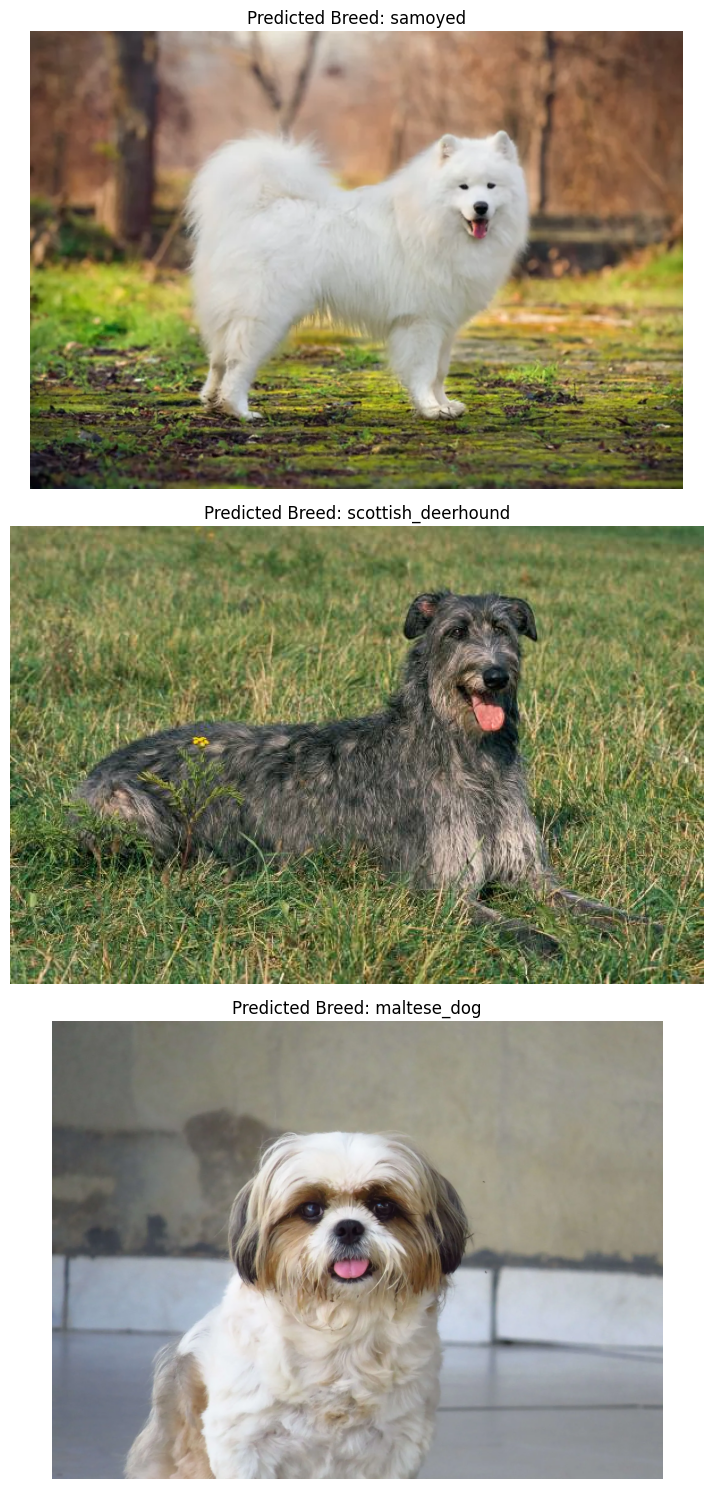

In [ ]:


import os
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing import image
from keras.models import load_model

# Function to load the image without resizing
def load_original_image(img_path):
    img = image.load_img(img_path)
    return img

# Function to preprocess the image (resizing and normalization)
def preprocess_image(img_path, target_size):
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  # Rescale the image
    return img, img_array

# Assuming your model input size is 128x128
target_size = (128, 128)

# Paths to the images you want to predict
image_paths = [
    '/content/samoyed.webp',
    '/content/scottish_deerhound.jpg',
    '/content/maltese_dog.webp'
]

# Load the trained model (if not already in memory)
# model = load_model('best_model.keras')  # Uncomment if you need to load the model from file

# Map the predicted class index to the corresponding breed
class_indices = train_generator.class_indices
class_indices = {v: k for k, v in class_indices.items()}  # Reverse the dictionary

# Plot each image on a separate line with predicted breed
plt.figure(figsize=(10, 5 * len(image_paths)))

for i, img_path in enumerate(image_paths, 1):
    # Load the original image without resizing
    original_img = load_original_image(img_path)
    img, img_array = preprocess_image(img_path, target_size)
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions, axis=1)[0]
    predicted_breed = class_indices[predicted_class]

    plt.subplot(len(image_paths), 1, i)
    plt.imshow(original_img)
    plt.title(f'Predicted Breed: {predicted_breed}')
    plt.axis('off')

plt.tight_layout()
plt.show()

